<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/%D0%A1%D0%B0%D1%84%D0%BE%D0%BD%D0%BE%D0%B2_%D1%81%D0%BE%D1%80%D0%B5%D0%B2%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%22kaggle_mnist_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Соревнования по распознаванию рукописных цифр на Kaggle

Пример кода для отправки решения в соревнование Kaggle - https://www.kaggle.com/c/digit-recognizer

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Настраиваем Kaggle API

Загружаем токен аутентификации

In [2]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!ls

kaggle.json  sample_data


Копируем токен в каталог .kaggle

In [4]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

## Загружаем данные с сайта Kaggle

In [5]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 74.3MB/s]
 55% 5.00M/9.16M [00:00<00:00, 15.3MB/s]
100% 9.16M/9.16M [00:00<00:00, 23.2MB/s]
 82% 5.00M/6.09M [00:00<00:00, 29.2MB/s]
100% 6.09M/6.09M [00:00<00:00, 29.8MB/s]


In [6]:
!ls

sample_data  sample_submission.csv  test.csv.zip  train.csv.zip


In [7]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [8]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [9]:
!ls

sample_data	       test.csv      train.csv
sample_submission.csv  test.csv.zip  train.csv.zip


## Проверяем формат данных

Данные для обучения

In [10]:
!head train.csv

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel1

Данные для тестирования

In [11]:
!head test.csv

pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pix

Пример файла с решением

In [12]:
!head sample_submission.csv

ImageId,Label
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Подготовка данных для обучения сети

Загружаем данные для обучения из файла

In [13]:
train_dataset = np.loadtxt('train.csv', skiprows=1, delimiter=',')

In [14]:
train_dataset[0:5]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Выделяем данные для обучения

In [15]:
x_train = train_dataset[:, 1:]
# Переформатируем данные в 2D, бэкенд TensorFlow
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Нормализуем данные для обучения

In [16]:
x_train /= 255.0

In [17]:
x_train[1].shape

(28, 28, 1)

Выделяем правильные ответы

In [18]:
y_train = train_dataset[:, 0]

In [19]:
y_train[:5]

array([1., 0., 1., 4., 0.])

Преобразуем ответы в формат one hot encoding

In [20]:
y_train = utils.to_categorical(y_train)

In [21]:
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Разделяем набор данных на две части: для обучения (X_Train, Y_train) и проверки (X_val, Y_val)

In [22]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train,
                                                  y_train, 
                                                  test_size = 0.1,
                                                  random_state=random_seed)

In [23]:
X_train.shape

(37800, 28, 28, 1)

Создаем генератор для расширения данных

In [184]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.13,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

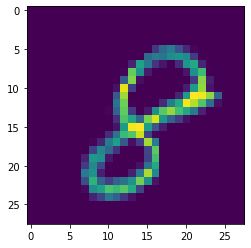

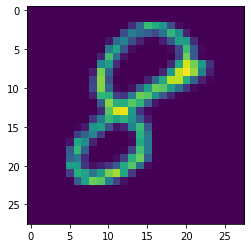

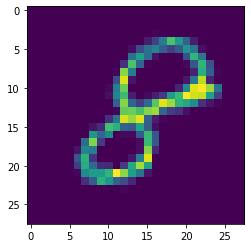

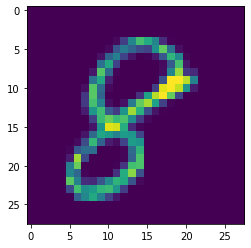

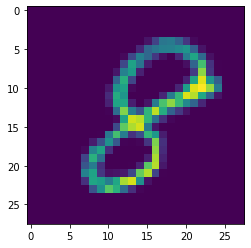

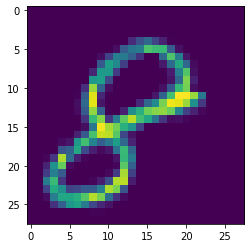

In [185]:
i = 0
data = X_train[0]
data = np.expand_dims(data, axis=0)
for batch in datagen.flow(data, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0][:,:,0])
    i += 1
    if i % 6 == 0:
        break
plt.show()

## Создаем нейронную сеть

**Создаем последовательную модель**

In [270]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='tanh', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='tanh'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "tanh"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

**Компилируем сеть**

In [271]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)         

## Обучаем нейронную сеть

In [272]:
filepath='/tmp/mnist-cnn.h5'


In [273]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [274]:
сheckpoint = ModelCheckpoint( filepath, 
                              monitor='val_accurancy', 
                              save_best_only=True,
                              verbose=1,
                              model = 'max' )

In [275]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=35, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [276]:
batch_size=80

In [277]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size), 
                    epochs=9,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    verbose=1,
                    callbacks=[сheckpoint, learning_rate_reduction])

Epoch 1/9
472/472 [==============================] - 11s 24ms/step - loss: 0.4080 - accuracy: 0.8697 - val_loss: 0.0862 - val_accuracy: 0.9743
Epoch 2/9
472/472 [==============================] - 11s 24ms/step - loss: 0.1906 - accuracy: 0.9405 - val_loss: 0.0795 - val_accuracy: 0.9748
Epoch 3/9
472/472 [==============================] - 11s 24ms/step - loss: 0.1511 - accuracy: 0.9542 - val_loss: 0.0551 - val_accuracy: 0.9836
Epoch 4/9
472/472 [==============================] - 11s 24ms/step - loss: 0.1407 - accuracy: 0.9569 - val_loss: 0.0563 - val_accuracy: 0.9829
Epoch 5/9
472/472 [==============================] - 11s 24ms/step - loss: 0.1350 - accuracy: 0.9580 - val_loss: 0.0492 - val_accuracy: 0.9836
Epoch 6/9
472/472 [==============================] - 11s 24ms/step - loss: 0.1192 - accuracy: 0.9644 - val_loss: 0.0452 - val_accuracy: 0.9860
Epoch 7/9
472/472 [==============================] - 11s 24ms/step - loss: 0.1174 - accuracy: 0.9635 - val_loss: 0.0444 - val_accuracy: 0.9857

In [239]:
!ls /tmp/

drivefs_ipc.0	     __pycache__     tmp6x6w8p61.py  tmpwddf0rb2
drivefs_ipc.0_shell  tmp4_tj_3nw.py  tmpr0n0xm_k.py


In [278]:
model.load_weights('/tmp/mnist-cnn.hdf5')

OSError: ignored

## Визуализация качества обучения


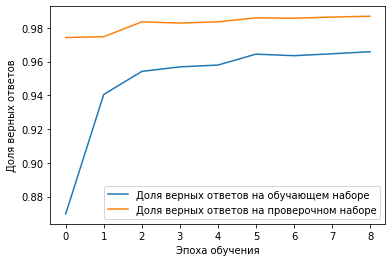

In [279]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем данные для распознавания

In [280]:
test_dataset = np.loadtxt('test.csv', skiprows=1, delimiter=",")

In [281]:
test_dataset[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [282]:
x_test = test_dataset.reshape(test_dataset.shape[0], 28, 28, 1)


Нормализация данных

In [283]:
x_test = x_test / 255.0

## Запускаем распознавание рукописных цифр из тестового набора данных

In [284]:
predictions = model.predict(x_test)

In [285]:
predictions[:5]

array([[2.5789818e-06, 4.8924839e-08, 9.9994707e-01, 4.2782762e-05,
        6.5859592e-07, 3.2275707e-09, 4.2022155e-08, 1.8773104e-06,
        4.2501692e-06, 5.9693610e-07],
       [9.9994397e-01, 1.7079880e-07, 9.4148536e-06, 2.7015594e-07,
        2.1002309e-08, 1.0706367e-06, 1.7293361e-05, 2.4432407e-07,
        1.7012813e-06, 2.6011316e-05],
       [7.8514999e-09, 2.1225523e-07, 4.9578930e-06, 6.0057246e-06,
        1.6388039e-03, 3.7710913e-07, 1.3859124e-08, 9.5741025e-06,
        1.6340682e-03, 9.9670595e-01],
       [9.9334300e-01, 4.6412147e-06, 1.5587298e-03, 1.4569099e-05,
        2.1087919e-05, 8.2884299e-06, 5.1784917e-04, 3.6321097e-05,
        1.1556743e-03, 3.3398110e-03],
       [2.0068002e-07, 5.7715401e-09, 1.4322622e-04, 9.9969161e-01,
        9.5630943e-09, 7.8576868e-06, 4.0759480e-09, 9.9043416e-07,
        1.5043629e-04, 5.6900299e-06]], dtype=float32)

Преобразуем результаты распознавания из формата one hot encoding в цифры

In [286]:
predictions = np.argmax(predictions, axis=1)

In [287]:
predictions[:5]

array([2, 0, 9, 0, 3])

## Готовим файл с решением для Kaggle

In [288]:
out = np.column_stack((range(1, predictions.shape[0]+1), predictions))

In [289]:
out[:5]

array([[1, 2],
       [2, 0],
       [3, 9],
       [4, 0],
       [5, 3]])

Записываем результаты в файл 

In [290]:
np.savetxt('submission.csv', out, header="ImageId,Label", 
            comments="", fmt="%d,%d")

In [291]:
!head submission.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0


## Отправляем решение на соревнование

In [292]:
!kaggle competitions submit -c digit-recognizer -m "Submition from Colab" -f submission.csv

100% 208k/208k [00:03<00:00, 58.0kB/s]
403 - Your team has used its submission allowance (5 of 5). This resets at midnight UTC (13 hours from now).
